In [1]:
# Import pandas library
import pandas as pd
import numpy as np
# Read csv data file
# Data without feature standardization
df = pd.read_csv('Labelled50GapRandom.csv')
# View the number of rows and columns
df.head()
df.dtypes
df.shape

(2169, 153)

In [2]:
df.head()

,Label_mL,Signal000,Signal001,Signal002,Signal003,Signal004,Signal005,Signal006,Signal007,Signal008,...,Signal709,Signal710,Signal711,Signal712,Signal713,Signal714,Signal715,Signal716,Signal717,Signal718
0,350,1322,1322,1322,1322,1322,1322,1322,1322,1323,...,1765,1764,1767,1768,1769,1773,1785,1785,1785,1786
1,300,1326,1326,1326,1326,1326,1326,1326,1327,1327,...,1773,1775,1773,1773,1774,1774,1775,1777,1787,1787
2,50,1412,1411,1410,1409,1407,1396,1386,1377,1362,...,1790,1791,1791,1788,1789,1789,1789,1788,1789,1788
3,300,1325,1326,1327,1326,1327,1326,1326,1327,1327,...,1772,1775,1773,1772,1774,1774,1775,1777,1787,1787
4,450,1320,1320,1320,1319,1320,1320,1320,1320,1322,...,1755,1753,1757,1758,1759,1764,1778,1778,1779,1779


In [3]:
# Display the summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Columns: 153 entries, Label_mL to Signal718
dtypes: int64(153)
memory usage: 2.5 MB


In [4]:
# Indicate the target column
target = df['Label_mL']
# Indicate the columns that will serve as features
features = df.drop('Label_mL', axis = 1)

In [5]:
# Split data into train and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)

In [6]:
# Import normalizer module
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.Normalizer()
# Fit the data on the Scaler object
scaled_features = scaler.fit_transform(x_train)
# View the first 5 rows of scaled_features array
scaled_features[0:5]

array([[0.0734468 , 0.0734468 , 0.07334262, 0.07318635, 0.07266545,
        0.07219664, 0.07172783, 0.07120693, 0.07037349, 0.06922752,
        0.06922752, 0.06917543, 0.06912334, 0.06917543, 0.06917543,
        0.06917543, 0.06917543, 0.06917543, 0.06922752, 0.07141529,
        0.0713632 , 0.07125902, 0.07099857, 0.06985259, 0.06896707,
        0.0682899 , 0.06782109, 0.06750855, 0.06787318, 0.06782109,
        0.06771691, 0.06719601, 0.06719601, 0.06688347, 0.06714392,
        0.06719601, 0.06719601, 0.0672481 , 0.07954132, 0.07959341,
        0.0796455 , 0.07969759, 0.07990595, 0.08027058, 0.08053103,
        0.08099984, 0.08141656, 0.08193746, 0.08193746, 0.08198955,
        0.08204164, 0.08204164, 0.08209373, 0.08204164, 0.08198955,
        0.08204164, 0.08198955, 0.08355225, 0.08355225, 0.08350016,
        0.08344807, 0.08334389, 0.08323971, 0.08313553, 0.08313553,
        0.0832918 , 0.08355225, 0.08355225, 0.08355225, 0.08370852,
        0.08370852, 0.08370852, 0.08370852, 0.08

In [7]:
names = x_train.columns
# After normalization, scaled_features is transformed into an array so we need to convert i
scaled_features_df = pd.DataFrame(scaled_features, columns = names)
# Compute the variance of each column
scaled_features_df.var()

Signal000    4.221924e-06
Signal001    4.097542e-06
Signal002    3.902244e-06
Signal003    3.557868e-06
Signal004    3.092513e-06
                 ...     
Signal714    3.398347e-07
Signal715    4.676024e-07
Signal716    3.366176e-07
Signal717    3.796323e-07
Signal718    3.683945e-07
Length: 152, dtype: float64

In [8]:
# Import VarianceThreshold module
from sklearn.feature_selection import VarianceThreshold
# Create VarianceThreshold object with a variance threshold of 0.1
thresholder = VarianceThreshold(threshold = 0.000001)
# Conduct variance thresholding - fit_transform() takes in an array
features_high_variance = thresholder.fit_transform(scaled_features)
# Use the get_support() function to identify the feature(s) above the variance threshold
thresholder.get_support(indices = True) 

array([  0,   1,   2,   3,   4,   5,   6,   7,  19,  20,  21,  22,  23,
        24,  25,  26,  31,  32,  33,  34,  95,  96,  97,  98,  99, 133],
      dtype=int64)

In [9]:
# Place the x_train and y_train data frames side by side
x = pd.concat([x_train, y_train], axis = 1)
# Generate correlation matrix
cor = x.corr()
# Print correlation matrix
cor

,Signal000,Signal001,Signal002,Signal003,Signal004,Signal005,Signal006,Signal007,Signal008,Signal009,...,Signal710,Signal711,Signal712,Signal713,Signal714,Signal715,Signal716,Signal717,Signal718,Label_mL
Signal000,1.000000,0.999675,0.997237,0.990876,0.979396,0.964991,0.922299,0.827423,0.691219,0.697851,...,0.738667,0.538810,0.305058,0.222566,0.092855,-0.308682,-0.351293,-0.422934,-0.443136,-0.500840
Signal001,0.999675,1.000000,0.998533,0.993062,0.982203,0.968968,0.928970,0.837170,0.700546,0.706946,...,0.746536,0.545039,0.308573,0.225877,0.095995,-0.307359,-0.348924,-0.419585,-0.439712,-0.499776
Signal002,0.997237,0.998533,1.000000,0.997055,0.988275,0.977767,0.944543,0.860814,0.724532,0.727418,...,0.762314,0.560964,0.318510,0.235321,0.106400,-0.297682,-0.337166,-0.407916,-0.427628,-0.498268
Signal003,0.990876,0.993062,0.997055,1.000000,0.995532,0.988259,0.961484,0.889947,0.764895,0.758737,...,0.792255,0.605097,0.365961,0.280947,0.153405,-0.248092,-0.288405,-0.359120,-0.378945,-0.525242
Signal004,0.979396,0.982203,0.988275,0.995532,1.000000,0.996352,0.975735,0.917129,0.812736,0.791553,...,0.810191,0.637479,0.396976,0.307761,0.181747,-0.213917,-0.257659,-0.325997,-0.346193,-0.532588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signal715,-0.308682,-0.307359,-0.297682,-0.248092,-0.213917,-0.206026,-0.182533,-0.092029,0.048383,-0.032380,...,0.175741,0.432117,0.734080,0.780753,0.837935,1.000000,0.969637,0.961015,0.952989,-0.565422
Signal716,-0.351293,-0.348924,-0.337166,-0.288405,-0.257659,-0.246627,-0.214421,-0.118755,0.011506,-0.045528,...,0.168874,0.443964,0.704038,0.774038,0.847114,0.969637,1.000000,0.968674,0.974058,-0.541696
Signal717,-0.422934,-0.419585,-0.407916,-0.359120,-0.325997,-0.316412,-0.283274,-0.176661,-0.035583,-0.098206,...,0.153888,0.415471,0.698673,0.765397,0.829622,0.961015,0.968674,1.000000,0.995730,-0.511186
Signal718,-0.443136,-0.439712,-0.427628,-0.378945,-0.346193,-0.335499,-0.300338,-0.191921,-0.050863,-0.110590,...,0.137079,0.408679,0.678876,0.754875,0.826094,0.952989,0.974058,0.995730,1.000000,-0.492478


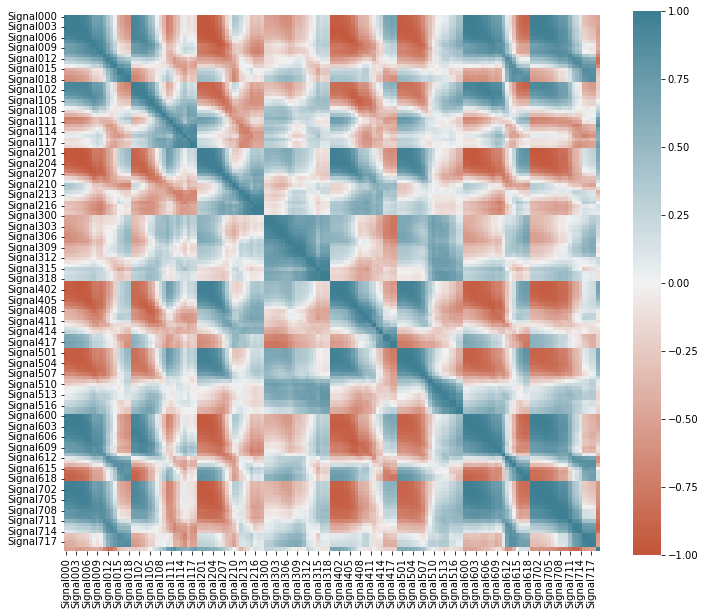

In [10]:
# Generating the correlation heatmap is optional
# The heatmap is just a visualization of the correlation matrix
# Import seaborn package to generate heatmap
import seaborn as sns
# Import pyplot to control the size of the plot
import matplotlib.pyplot as plt
# Set plot size
plt.figure(figsize=(12,10))
# Generate the heatmap
ax = sns.heatmap(cor,
 vmin = -1, vmax = 1, center = 0,
 cmap = sns.diverging_palette(20, 220, n=200),
 square = True,
 #annot = True
)

In [11]:
# Select features above a correlation threshold to target
# Correlation with target
# Apply abs() to get the absolute value so no need to deal with negative correlations
cor_target = abs(cor['Label_mL'])
# Selecting highly correlated features
# Say we set the correlation threshold to 0.2
relevant_features = cor_target[cor_target > 0.8]
relevant_features

Signal012    0.811429
Signal013    0.814780
Signal112    0.852919
Signal711    0.806151
Signal712    0.885741
Signal713    0.892628
Signal714    0.825167
Label_mL     1.000000
Name: Label_mL, dtype: float64

In [12]:
# Currently the target is integer data type
y_train.dtype

dtype('int64')

In [13]:
# Convert integer to string
y_train.astype(str)

1027    150
231     350
377     250
1673    400
862     500
       ... 
1033    450
1731    350
763       0
835     300
1653      0
Name: Label_mL, Length: 1301, dtype: object

In [14]:
# Import SelectKBest and chi2 modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Create a selector
# Setting k = 3 means we want the top 3 features
selector = SelectKBest(chi2, k = 5)
# Select top 3 features based on the training set
x_new = selector.fit_transform(x_train, y_train)
selector.get_support(indices=True)

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
# Import SelectKBest and mutual_info_classif modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Create a selector
# Setting k = 3 means we want the top 3 features
selector = SelectKBest(mutual_info_classif, k = 5)
# Select top 3 features based on the training set
x_new = selector.fit_transform(x_train, y_train)
selector.get_support(indices=True)

array([18, 95, 96, 97, 98], dtype=int64)

In [24]:
# Import SelectKBest and mutual_info_classif modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Create a selector
# Setting k = 3 means we want the top 3 features
selector = SelectKBest(mutual_info_classif, k = 3)
# Select top 3 features based on the training set
x_new = selector.fit_transform(x_train, y_train)
selector.get_support(indices=True)

array([95, 96, 97], dtype=int64)

In [ ]:
# Import RFE and machine learning algorithm
from sklearn.feature_selection import RFE
# Import SVM - We are using SVM as an example
from sklearn.svm import SVC
# Create a SVM classifier with linear kernel
svmlinear = SVC(kernel = 'linear')
# Use RFE to rank features and return top 3 features
# Parameter step corresponds to the (integer) number of features to remove at each iteratio
rfe = RFE(estimator = svmlinear, n_features_to_select = 3, step = 1)
rfe.fit(x_train, y_train)
print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

In [ ]:
# Import PCA
from sklearn.decomposition import PCA
# Specify the number of components = 2
pca = PCA(n_components = 2)
# Generate the principal components
pca.fit(x_train)
# Transform the training set into principal components
train_pca = pca.transform(x_train)
# Transform the test set into principal components
test_pca = pca.transform(x_test)
# Convert train set into a data frame to make it easier to view
principalDf = pd.DataFrame(data = train_pca, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

In [16]:
'''features = df[[  'Signal012',
                'Signal013',
                'Signal112',
                'Signal711',
                'Signal712',
                'Signal713',
                'Signal714' 
                ]]'''

features = df[[  #'Signal007',
                'Signal418'
                ,'Signal500'
                ,'Signal512'
               # ,'Signal513'
             ]]

In [17]:
# Split data into train, validation and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training + development set and test set
x, x_test, y, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)

In [18]:
# Training a KNN model
# Import k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k = 1
knn = KNeighborsClassifier(n_neighbors = 1)
# Train the model using the training set
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=1)

In [19]:
# Predict the target for the development dataset
dev_predict = knn.predict(x_test)
#dev_predict

In [20]:
# Evaluate the knn model on development set
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

Accuracy:  0.9919354838709677


In [21]:
# Initialize 2 empty lists (K and validation) to store the values of k and validation score
# Initialize 1 empty dictionary (scores) to store the k:validation_score (key:value) pairs
K = []
validation = []
scores = {}
# The for loop will test k values from 1 to 29
for k in range(1, 30):
 clf = KNeighborsClassifier(n_neighbors = k)
 clf.fit(x, y)

 # Can also use the score() function to compute accuracy
 # Compute accuracy by applying the model on the development set
 validation_score = clf.score(x_test, y_test)

 # Adds a single item (k value) to the list
 K.append(k)

 validation.append(validation_score)

 # A dictionary holds key:value pairs
 # Store the validation score for each value of k (k is the key)
 scores[k] = [validation_score]
# Print the key:value pairs in scores
for keys, values in scores.items():
 print('n_neighbors:',keys, ':', values)

n_neighbors: 1 : [0.9919354838709677]
n_neighbors: 2 : [0.9861751152073732]
n_neighbors: 3 : [0.9850230414746544]
n_neighbors: 4 : [0.9896313364055299]
n_neighbors: 5 : [0.9838709677419355]
n_neighbors: 6 : [0.9792626728110599]
n_neighbors: 7 : [0.9700460829493087]
n_neighbors: 8 : [0.9688940092165899]
n_neighbors: 9 : [0.967741935483871]
n_neighbors: 10 : [0.9654377880184332]
n_neighbors: 11 : [0.9642857142857143]
n_neighbors: 12 : [0.9585253456221198]
n_neighbors: 13 : [0.9585253456221198]
n_neighbors: 14 : [0.9585253456221198]
n_neighbors: 15 : [0.9550691244239631]
n_neighbors: 16 : [0.956221198156682]
n_neighbors: 17 : [0.9539170506912442]
n_neighbors: 18 : [0.9550691244239631]
n_neighbors: 19 : [0.956221198156682]
n_neighbors: 20 : [0.9550691244239631]
n_neighbors: 21 : [0.9539170506912442]
n_neighbors: 22 : [0.9516129032258065]
n_neighbors: 23 : [0.9516129032258065]
n_neighbors: 24 : [0.9504608294930875]
n_neighbors: 25 : [0.9470046082949308]
n_neighbors: 26 : [0.945852534562212]

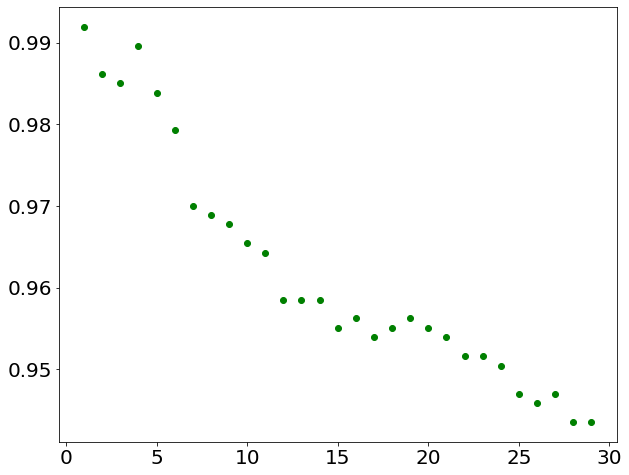

In [22]:
# Import matplotlib library
import matplotlib.pyplot as plt
# Set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
plt.scatter(K, validation, color ='g')
plt.show() 

In [23]:
pre = []
acc = []
true = []
for i in range(10):
    knn = KNeighborsClassifier(n_neighbors = 1)
    # Train the model using the training set
    
    knn.fit(x, y)
    
    dev_predict = knn.predict(x_test)
    
    ACC = metrics.accuracy_score(y_test, dev_predict)
    print(ACC)
    
    pre.append(dev_predict)
    true.append(y_test)
    acc.append(ACC)
m=np.mean(acc)
std=np.std(acc)

pre=np.array(pre).reshape(8680)
true=np.array(true).reshape(8680)
print(" ")
print(m)
print(std)
#pre

0.9919354838709677
0.9919354838709677
0.9919354838709677
0.9919354838709677
0.9919354838709677
0.9919354838709677
0.9919354838709677
0.9919354838709677
0.9919354838709677
0.9919354838709677
 
0.9919354838709677
0.0
